In [1]:
import numpy as  np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
img_right = cv2.imread('images/right.png')
img_left = cv2.imread('images/left.png')
img_up = cv2.imread('images/up.png')

(120, 160, 3)


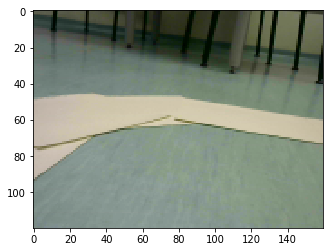

In [11]:
img2 = cv2.cvtColor(img_right, cv2.COLOR_BGR2RGB)
print(img2.shape)
img2 = img2.reshape((120,160,3))
plt.imshow(img2)

## Escolhendo threshold para a pista

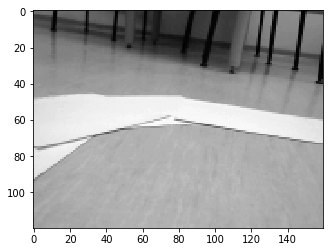

In [3]:
gray_img = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap="gray")

In [4]:
def adjust_gamma(image, gamma=1.0):

   invGamma = 1.0 / gamma
   table = np.array([((i / 255.0) ** invGamma) * 255 
      for i in np.arange(0, 256)]).astype("uint8")
   return cv2.LUT(image, table)

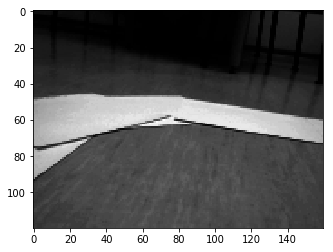

In [5]:
gamma = 0.3 # less than 1 decreases the brightness of the image
img_gamma = adjust_gamma(gray_img, gamma=gamma)
plt.imshow(img_gamma, cmap='gray')

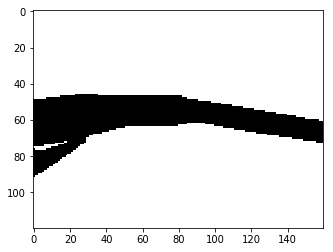

In [6]:
blur = cv2.GaussianBlur(img_gamma, (5,5), 0)
_, bin_img = cv2.threshold(blur,
                           177,
                           255,
                           cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(bin_img, cmap='binary')

## Testando scripts de manipulação de imagens (image_manipulation.py)

### Testando binarize_image() 

In [7]:
from image_manipulation import binarize_image # file located in ../data_manipulation/image_manipulation.py

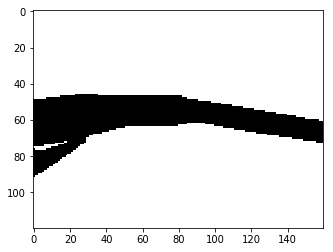

In [8]:
binarized_img = binarize_image(img_right)
plt.imshow(binarized_img, cmap='binary')

### Testando green_channel()

In [9]:
from image_manipulation import green_channel

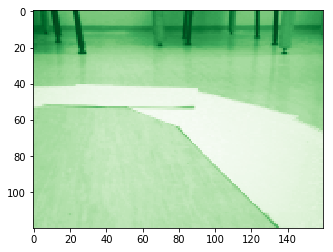

In [12]:
green_img = green_channel(img_left)
plt.imshow(green_img, cmap=plt.cm.Greens_r)

### Testando top_bottom_cut()

In [13]:
from image_manipulation import top_bottom_cut

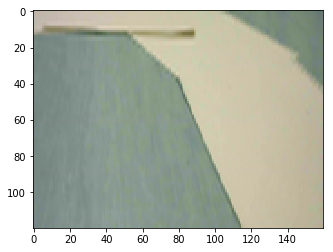

In [23]:
cut_img = top_bottom_cut(img_left)
cut_img = cv2.cvtColor(cut_img, cv2.COLOR_BGR2RGB)
plt.imshow(cut_img)

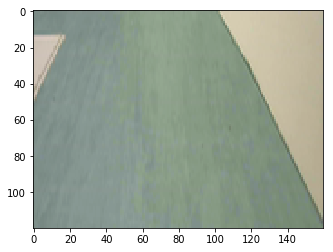

In [24]:
cut_img = top_bottom_cut(img_up)
cut_img = cv2.cvtColor(cut_img, cv2.COLOR_BGR2RGB)
plt.imshow(cut_img)

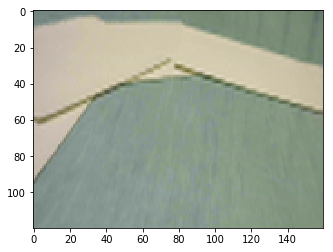

In [25]:
cut_img = top_bottom_cut(img_right)
cut_img = cv2.cvtColor(cut_img, cv2.COLOR_BGR2RGB)
plt.imshow(cut_img)